# Final Project #
### DSCD 530###

Matt Burns

5/30/19

### Import Modules###

In [2]:
from __future__ import print_function, division

%matplotlib inline

import numpy as np
import random
import thinkplot
import pandas as pd
import thinkstats2
import statsmodels.formula.api as smf

### Milestone 1###
(Week 1-2) – Evaluate datasets, start thinking of statistical questions

### Import Data###

In [3]:
df = pd.read_excel (r'C:\Users\burns\OneDrive\Desktop\Matt\Grad School\DSC 530\Project\BLS Current Employment Statistics.xlsx', sheet_name='Time Series')
df.dropna()
df.describe()

,month,private,nonfarm,goods,service,mine_log,leasure,manufacturing,gov,retail,trans_util,ng_price_ind,ng_price_res
count,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000
mean,201356.500000,116309.808333,138493.541667,19088.491667,119405.050000,767.550000,14539.700000,12104.975000,22183.733333,15205.633333,26105.266667,4.550500,12.576333
std,288.453279,6440.975278,6454.344750,932.894285,5561.219038,82.778722,1180.641562,361.598074,267.653851,539.533612,1085.456638,0.903218,2.873658
min,200901.000000,107239.000000,129715.000000,17627.000000,112012.000000,644.000000,12927.000000,11453.000000,21814.000000,14334.800000,24425.000000,2.890000,8.280000
25%,201106.750000,110323.500000,132490.250000,18297.500000,113994.000000,690.000000,13363.250000,11796.500000,21930.750000,14723.900000,25135.500000,3.825000,10.005000
50%,201356.500000,115661.500000,137478.500000,19070.500000,118569.500000,750.000000,14471.500000,12127.000000,22186.500000,15245.900000,26080.500000,4.550000,11.975000
75%,201606.250000,122046.250000,144273.000000,19747.500000,124551.000000,851.000000,15646.750000,12361.250000,22402.250000,15809.100000,27184.000000,5.050000,15.165000
max,201812.000000,127772.000000,150270.000000,20974.000000,129296.000000,903.000000,16544.000000,12809.000000,22996.000000,15940.700000,27783.000000,7.500000,18.630000


In [4]:
df

,month,date,private,nonfarm,goods,service,mine_log,leasure,manufacturing,gov,retail,trans_util,ng_price_ind,ng_price_res
NaN,200901,2009-01-01,111495,134074,19889,114185,761,13222,12561,22579,14794.5,25433,7.50,12.49
NaN,200902,2009-02-01,110756,133332,19575,113757,749,13193,12380,22576,14719.4,25286,6.43,12.26
NaN,200903,2009-03-01,109969,132529,19227,113302,728,13127,12208,22560,14650.7,25140,5.69,11.98
NaN,200904,2009-04-01,109158,131835,18894,112941,710,13056,12030,22677,14563.1,24960,5.05,11.68
NaN,200905,2009-05-01,108874,131491,18655,112836,693,13106,11862,22617,14558.3,24909,4.40,12.86
NaN,200906,2009-06-01,108450,131026,18422,112604,686,13076,11726,22576,14541.0,24852,4.56,14.26
NaN,200907,2009-07-01,108164,130685,18278,112407,678,13078,11668,22521,14488.9,24750,4.68,15.27
NaN,200908,2009-08-01,107964,130501,18151,112350,670,13046,11626,22537,14480.5,24713,4.38,15.61
NaN,200909,2009-09-01,107808,130259,18043,112216,665,13054,11591,22451,14450.2,24660,3.89,14.80
NaN,200910,2009-10-01,107537,130061,17915,112146,661,12995,11538,22524,14381.6,24553,4.82,11.78


In [5]:
ngpi = df.ng_price_ind.round(decimals=1)
ngpr = df.ng_price_res.round(decimals=1)
month = df.month

In [6]:
ts = pd.Series(range(len(month)), index=month) + 1

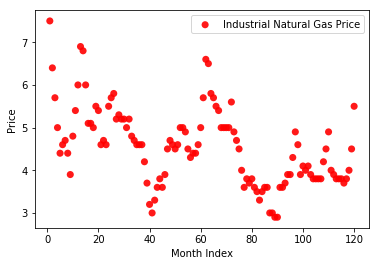

In [7]:
thinkplot.Scatter(ts, ngpi, color='Red', alpha=0.9, s=50,label='Industrial Natural Gas Price')
thinkplot.Config(xlabel='Month Index', ylabel='Price')

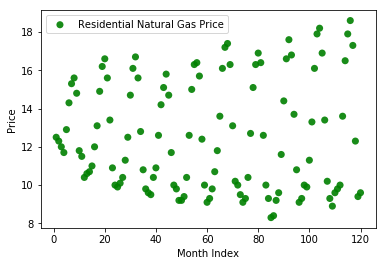

In [8]:
thinkplot.Scatter(ts, ngpr, color='Green', alpha=0.9, s=50, label='Residential Natural Gas Price')
thinkplot.Config(xlabel='Month Index', ylabel='Price')

In [9]:
df = df.drop("ng_price_res", axis=1)

In [10]:
print("Frame length",len(df))
print(df.columns[0],"length ",len(df.iloc[:,0]))
print(df.columns[1],"length ",len(df.iloc[:,1]))
print(df.columns[2],"length ",len(df.iloc[:,2]))
print(df.columns[3],"length ",len(df.iloc[:,4]))
print(df.columns[4],"length ",len(df.iloc[:,5]))
print(df.columns[5],"length ",len(df.iloc[:,5]))
print(df.columns[6],"length ",len(df.iloc[:,6]))
print(df.columns[7],"length ",len(df.iloc[:,7]))
print(df.columns[8],"length ",len(df.iloc[:,8]))
print(df.columns[9],"length ",len(df.iloc[:,9]))
print(df.columns[10],"length ",len(df.iloc[:,10]))
print(df.columns[11],"length ",len(df.iloc[:,11]))
print(df.columns[12],"length ",len(df.iloc[:,12]))

Frame length 120
month length  120
date length  120
private length  120
nonfarm length  120
goods length  120
service length  120
mine_log length  120
leasure length  120
manufacturing length  120
gov length  120
retail length  120
trans_util length  120
ng_price_ind length  120


In [11]:
df.to_csv('BLSandEIAdata.csv', sep=',', encoding='utf-8')

### Milestone 2###
(Weeks 3-4) – Select a dataset, solidify your statistical question, begin describing the single variables in your dataset to determine which variables are relevant to your question (Distributions, PMFs, CDFs).

In [12]:
ngp = df.ng_price_ind.round(decimals=1)
priv_emp = df.private
nonfarm_emp= df.nonfarm
private_emp= df.private
nonfarm_emp= df.nonfarm
goods_emp = df.goods
service_emp = df.service
mine_log = df.mine_log
leasure_emp = df.leasure
manu_emp = df.manufacturing
gov_emp = df.gov
retail_emp = df.retail
trans_util = df.trans_util

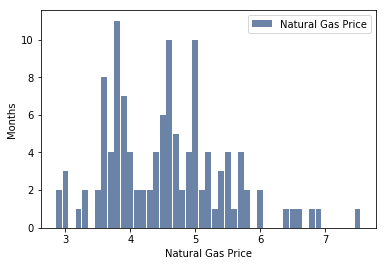

In [13]:
hist = thinkstats2.Hist(ngp, label='Natural Gas Price')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='Natural Gas Price', ylabel='Months')

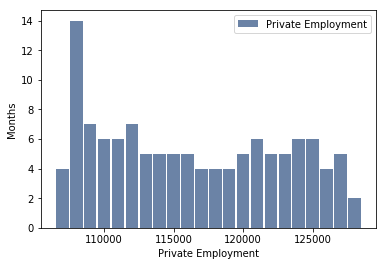

In [21]:
hist = thinkstats2.Hist(priv_emp.round(decimals=-3), label='Private Employment')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='Private Employment', ylabel='Months')

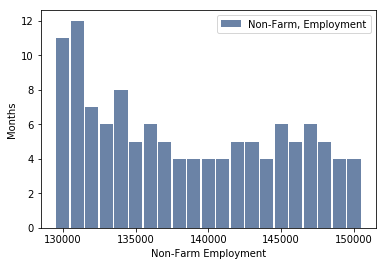

In [23]:
hist = thinkstats2.Hist(nonfarm_emp.round(decimals=-3), label='Non-Farm, Employment')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='Non-Farm Employment', ylabel='Months')

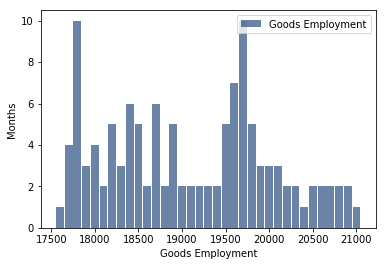

In [25]:
hist = thinkstats2.Hist(goods_emp.round(decimals=-2), label='Goods Employment')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='Goods Employment', ylabel='Months')

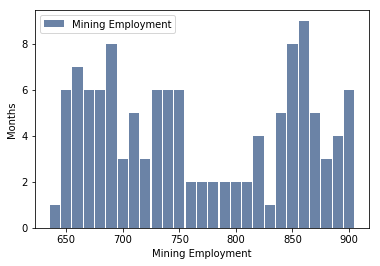

In [28]:
hist = thinkstats2.Hist(mine_log.round(decimals=-1), label='Mining Employment')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='Mining Employment', ylabel='Months')

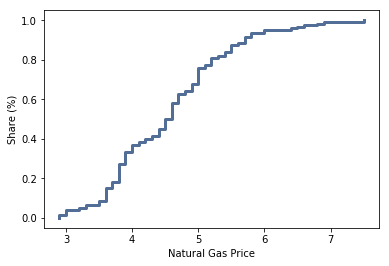

In [29]:
cdf = thinkstats2.Cdf(ngp)
thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='Natural Gas Price', ylabel='Share (%)')

In [94]:
ngp1=ngp[0:12,]
ngp8=ngp[96:108,]

In [95]:
type(ngp1)


pandas.core.series.Series

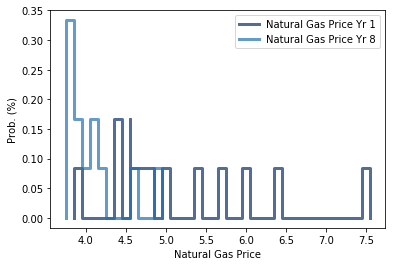

In [96]:
pmf1 = thinkstats2.Pmf(ngp1, label='Natural Gas Price Yr 1')
pmf8 = thinkstats2.Pmf(ngp8, label='Natural Gas Price Yr 8')
thinkplot.Pmfs([pmf1,pmf8])
thinkplot.Config(xlabel='Natural Gas Price', ylabel='Prob. (%)')

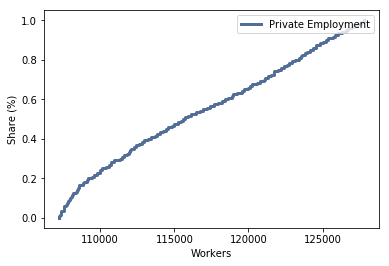

In [97]:
cdf = thinkstats2.Cdf(priv_emp, label='Private Employment')
thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='Workers', ylabel='Share (%)')

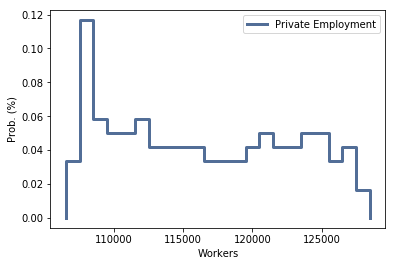

In [98]:
pmf = thinkstats2.Pmf(priv_emp.round(decimals=-3), label='Private Employment')
thinkplot.Pmf(pmf)
thinkplot.Config(xlabel='Workers', ylabel='Prob. (%)')

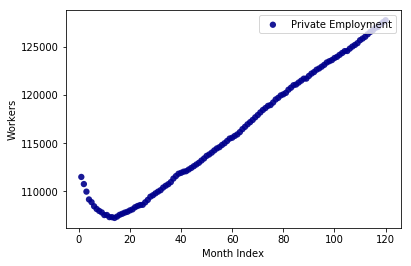

In [99]:
thinkplot.Scatter(ts, priv_emp, color='darkblue', alpha=0.9, s=40,label='Private Employment')
thinkplot.Config(xlabel='Month Index', ylabel='Workers')

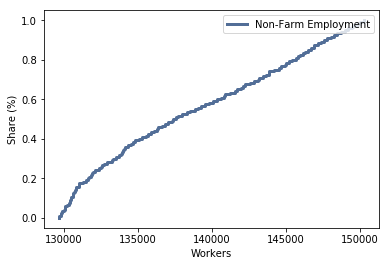

In [100]:
cdf = thinkstats2.Cdf(nonfarm_emp, label='Non-Farm Employment')
thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='Workers', ylabel='Share (%)')

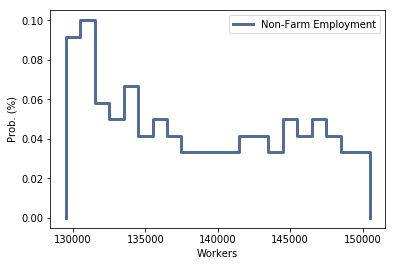

In [101]:
pmf = thinkstats2.Pmf(nonfarm_emp.round(decimals=-3), label='Non-Farm Employment')
thinkplot.Pmf(pmf)
thinkplot.Config(xlabel='Workers', ylabel='Prob. (%)')

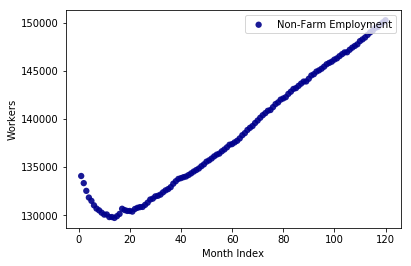

In [102]:
thinkplot.Scatter(ts, nonfarm_emp, color='darkblue', alpha=0.9, s=40,label='Non-Farm Employment')
thinkplot.Config(xlabel='Month Index', ylabel='Workers')

### Milestone 3###
eks 5-6) – 
Start identifying relationships between the variables you have identified vs looking at just one variable at a time.

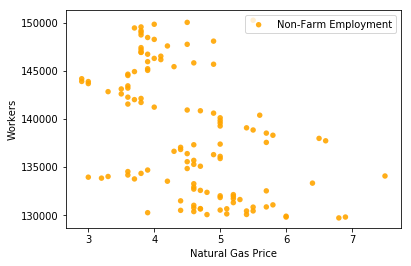

In [103]:
thinkplot.Scatter(ngp, nonfarm_emp, color='orange', alpha=0.9, s=30,label='Non-Farm Employment')
thinkplot.Config(xlabel='Natural Gas Price', ylabel='Workers')

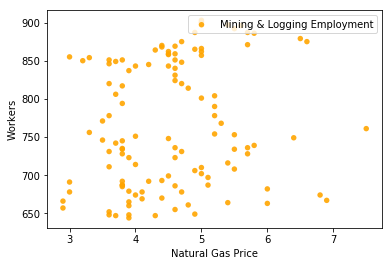

In [104]:
thinkplot.Scatter(ngp, mine_log, color='orange', alpha=0.9, s=30,label='Mining & Logging Employment')
thinkplot.Config(xlabel='Natural Gas Price', ylabel='Workers')

In [105]:
model = smf.ols('mine_log ~ ngp', data=df)
results = model.fit()
display(results.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               mine_log   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     3.273
Date:                Thu, 30 May 2019   Prob (F-statistic):             0.0730
Time:                        22:32:58   Log-Likelihood:                -698.07
No. Observations:                 120   AIC:                             1400.
Df Residuals:                     118   BIC:                             1406.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    699.0139     38.615     18.102      0.000     622.546     775.481
ngp           15.0629      8.326      1.809      0.073      -1.424      31.550
==============================================================================
Omnibus:                      361.268   Durbin-Watson:                   0.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               11.287
Skew:                           0.072   Prob(JB):                      0.00354
Kurtosis:                       1.504   Cond. No.                         25.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [106]:
model = smf.ols('mine_log ~ ngp+nonfarm_emp ', data=df)
results = model.fit()
display(results.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               mine_log   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     2.932
Date:                Thu, 30 May 2019   Prob (F-statistic):             0.0572
Time:                        22:32:58   Log-Likelihood:                -696.78
No. Observations:                 120   AIC:                             1400.
Df Residuals:                     117   BIC:                             1408.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    1027.2700    209.197      4.911      0.000     612.967    1441.573
ngp             7.5656      9.512      0.795      0.428     -11.273      26.404
nonfarm_emp    -0.0021      0.001     -1.596      0.113      -0.005       0.001
==============================================================================
Omnibus:                      130.658   Durbin-Watson:                   0.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                9.684
Skew:                           0.045   Prob(JB):                      0.00789
Kurtosis:                       1.611   Cond. No.                     3.90e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.9e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Milestone 4###
(Weeks 7-10) – Start evaluating if the results you are seeing in a sample would happen in the large population and start testing out the results and hypothesis you have made up to this point.

Plot 1 analytical distribution and provide your analysis on how it applies to the dataset you have chosen (Chapter 5).

### We will use lognormal distribution##

In [107]:
## Function from Allen Downey
def MakeNormalModel(weights):
    """Plots a CDF with a Normal model.

    weights: sequence
    """
    cdf = thinkstats2.Cdf(weights, label='price')

    mean, var = thinkstats2.TrimmedMeanVar(weights)
    std = np.sqrt(var)
    print('n, mean, std', len(weights), mean, std)

    xmin = mean - 4 * std
    xmax = mean + 4 * std

    xs, ps = thinkstats2.RenderNormalCdf(mean, std, xmin, xmax)
    thinkplot.Plot(xs, ps, label='model', linewidth=4, color='0.8')
    thinkplot.Cdf(cdf)

n, mean, std 120 0.6494122090526855 0.08095341239234768


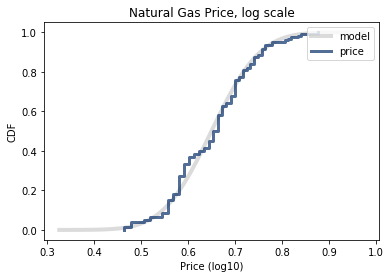

In [108]:
log_ngp = np.log10(ngp)
MakeNormalModel(log_ngp)
thinkplot.Config(title='Natural Gas Price, log scale', xlabel='Price (log10)',
                 ylabel='CDF', loc='upper right')

Conduct a test on your hypothesis using one of the methods covered in Chapter 9.

### Use Pearson's correlation to test hypothesis###

Null Hypothesis is that there is no correlation.

In [109]:
class CorrelationPermute(thinkstats2.HypothesisTest):

    def TestStatistic(self, data):
        xs, ys = data
        test_stat = abs(thinkstats2.Corr(xs, ys))
        return test_stat

    def RunModel(self):
        xs, ys = self.data
        xs = np.random.permutation(xs)
        return xs, ys

In [110]:
data = ngp.values, mine_log.values

In [111]:
iters=1000
ht = CorrelationPermute(data)
p3 = ht.PValue(iters=iters)

In [112]:
print("p-value",p3)

p-value 0.066


p-value > 5%
The correlation is not significant.